In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle
from pathlib import Path
import logging
import sys
import os
import re
import cv2
sys.path.insert(0, '/src')
from src.autoencoder import Autoencoder
from src.cnn_classifier import CNN_Classifier
from src.img_utils import read_images_in_dir, transform_images, read_novel_image, image_to_imagedatagen#, price_filter
from src.image_segmentation import get_biggest_two_bounding

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
)

In [2]:
## Hyperparametets
img_height = 100
img_width = 100
img_channel = 3 #RGB

price_limit = 100

image_path = 'data/earrings_full_training/794612301.jpg'
image_file = re.split('[./]', image_path)[-2]
# print(image_file)
classifer_model = 'models/jewelry_final_cnn_classifer.pkl'


output_dir = f'input_images/{image_file}'
os.makedirs(output_dir, exist_ok=True)

In [3]:
####### Classify jewelry type
# Segment Input Image
logging.info(f"Reading and Processing Images from {image_path}")
img1, img2 = get_biggest_two_bounding(image_path, output_dir)

2019-11-10 21:14:07,768 INFO     Reading and Processing Images from data/earrings_full_training/794612301.jpg
2019-11-10 21:14:07,794 INFO     Processing Images from 794612301
2019-11-10 21:14:07,843 INFO     Processing Images from 794612301


794612301


In [4]:
image_to_imagedatagen('input_images', class_mode=None)

Found 2 images belonging to 1 classes.


In [5]:
new_images = image_to_imagedatagen('input_images')

Found 2 images belonging to 1 classes.


In [6]:
new_images.directory

'input_images'

In [7]:
#Load in pretrained CNN Classifier
jewelry_classifier =  pickle.load(open(classifer_model, 'rb'))

In [8]:

# Get the probabilites and identify jewelry type
logging.info(f"Predicting Jewelry Type")
probabilities = jewelry_classifier.predict(new_images)

print(jewelry_classifier.predict(new_images))

2019-11-10 21:14:09,402 INFO     Predicting Jewelry Type


[[1.]
 [1.]]


In [9]:
np.average(probabilities)

1.0

In [10]:
if np.average(probabilities) > 0.5:  
    train_dir = 'data/training_full/segmented_earrings'
    encoder_model = 'models/jewelry_cnn_encoder_earrings_test.pkl'
    knn_model = 'models/jewelry_knn_earrings_test.pkl'
else:
    train_dir = 'data/training_full/necklaces'
    encoder_model = 'models/jewelry_cnn_autoencoder_necklaces_test.pkl'
    knn_model = 'models/jewelry_knn_necklaces_test.pkl'

In [11]:
### Decrease Features with Autoencoding 
logging.info(f"Extracting Visual Features")
encoder =  pickle.load(open(encoder_model, 'rb'))

2019-11-10 21:14:09,964 INFO     Extracting Visual Features
/Users/linhchau/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [14]:
new_image = read_novel_image(image_path, img_height, img_width)
norm_image = np.array(new_image).astype('float32') / 255.

In [15]:
norm_image.shape

(100, 100, 3)

In [16]:
norm_image.reshape(1,100,100,3)

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [17]:
# Reads in a single image
def read_novel_image(imagedir, img_height, img_width):
    img = cv2.imread(imagedir, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_height, img_width))
    return np.array(img)

In [18]:
encoded_image = encoder.predict(norm_image.reshape(1,100,100,3))
encoded_image_flat = encoded_image.reshape((-1, np.prod(encoded_image.shape[1:])))

In [19]:
train_ids = pd.read_csv('data/training_files.csv', header=None)
train_ids =list(train_ids[0])
train_ids

['113277145',
 '118378803',
 '139377319',
 '161080128',
 '202982050',
 '210253520',
 '210275662',
 '230380759',
 '244140427',
 '244150953',
 '246223047',
 '266805684',
 '266805719',
 '273312883',
 '277139083',
 '277143262',
 '294737396',
 '306985589',
 '329895687',
 '329946434',
 '333525663',
 '333596968',
 '335213916',
 '340340285',
 '36112489',
 '364230810',
 '37725189',
 '379082979',
 '385683169',
 '385684948',
 '385685003',
 '385689374',
 '385689432',
 '385689995',
 '385690049',
 '385690468',
 '386153146',
 '386952888',
 '386953000',
 '389662026',
 '389662237',
 '393168805',
 '405542558',
 '408544172',
 '415401304',
 '427270411',
 '429171527',
 '429626972',
 '429627389',
 '429627828',
 '429628334',
 '432264795',
 '435776370',
 '436062094',
 '436072964',
 '436080034',
 '436115249',
 '436115280',
 '436257708',
 '436258733',
 '436777525',
 '437670630',
 '437843092',
 '437857043',
 '437859008',
 '437863124',
 '437865824',
 '437867147',
 '438099656',
 '438351445',
 '439257865',
 '439656

In [20]:
logging.info(f"Finding Neighbors")
knn =  pickle.load(open(knn_model, 'rb'))

# Predict KNN for a test image
distances, indices = knn.kneighbors(encoded_image_flat.reshape(1, -1))

# filters neighbors based off of prices
logging.info('Price Filtering')
product_data = pd.read_csv('data/product_metadata.csv') # training product metadata


2019-11-10 21:14:37,315 INFO     Finding Neighbors
2019-11-10 21:14:37,525 INFO     Price Filtering


In [139]:
product_data['clickUrl'][0]

'https://www.shopstyle.com/action/loadRetailerProductPage?id=7242404'

In [21]:
indices

array([[15182, 10391, 14074, 15178,  8356, 10393,  8301, 12496, 10316,
         2664]])

In [22]:
re.split('_', train_ids[10391])[0]

'752025949'

In [28]:
type(price_limit)

int

In [145]:
# filters the price of the neighbooring images
def price_filter_novel(neighbors, product_ids, product_data, price_limit=100):
    filtered_products = []
    product_prices = []
    product_urls = []
    product_images = []
    for neighbor in neighbors:
        product_id = re.split('_',product_ids[neighbor])[0]
        price = float(product_data[product_data['id'] == int(product_id)]['price'])
        url = product_data['clickUrl'][product_data['id'] == int(product_id)]
        if price < price_limit:
            filtered_products.append(neighbor)
            product_prices.append(price)
            product_urls.append(url)
            product_images.append(f'data/data/{product_id}.jpg')
    return (filtered_products, product_prices, product_urls, product_images)

In [146]:
filtered_products, product_prices, product_urls, product_images = price_filter_novel(indices[0], 
                                                   train_ids, 
                                                   product_data,
                                                 price_limit,
                                                                   )

In [147]:
product_urls

[14304    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 7104    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 3674    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 7106    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object]

In [148]:
product_images

['data/data/788964006.jpg',
 'data/data/752025949.jpg',
 'data/data/693236243.jpg',
 'data/data/752025955.jpg']

In [149]:
filtered_products

[15182, 10391, 8356, 10393]

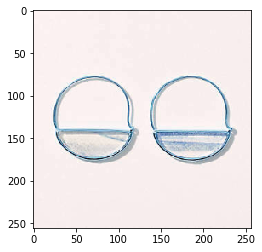

In [150]:
plt.imshow(read_novel_image(product_images[0], 256, 256))

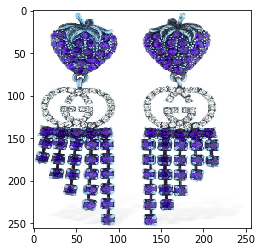

In [151]:
plt.imshow(read_novel_image(image_path, 256, 256))

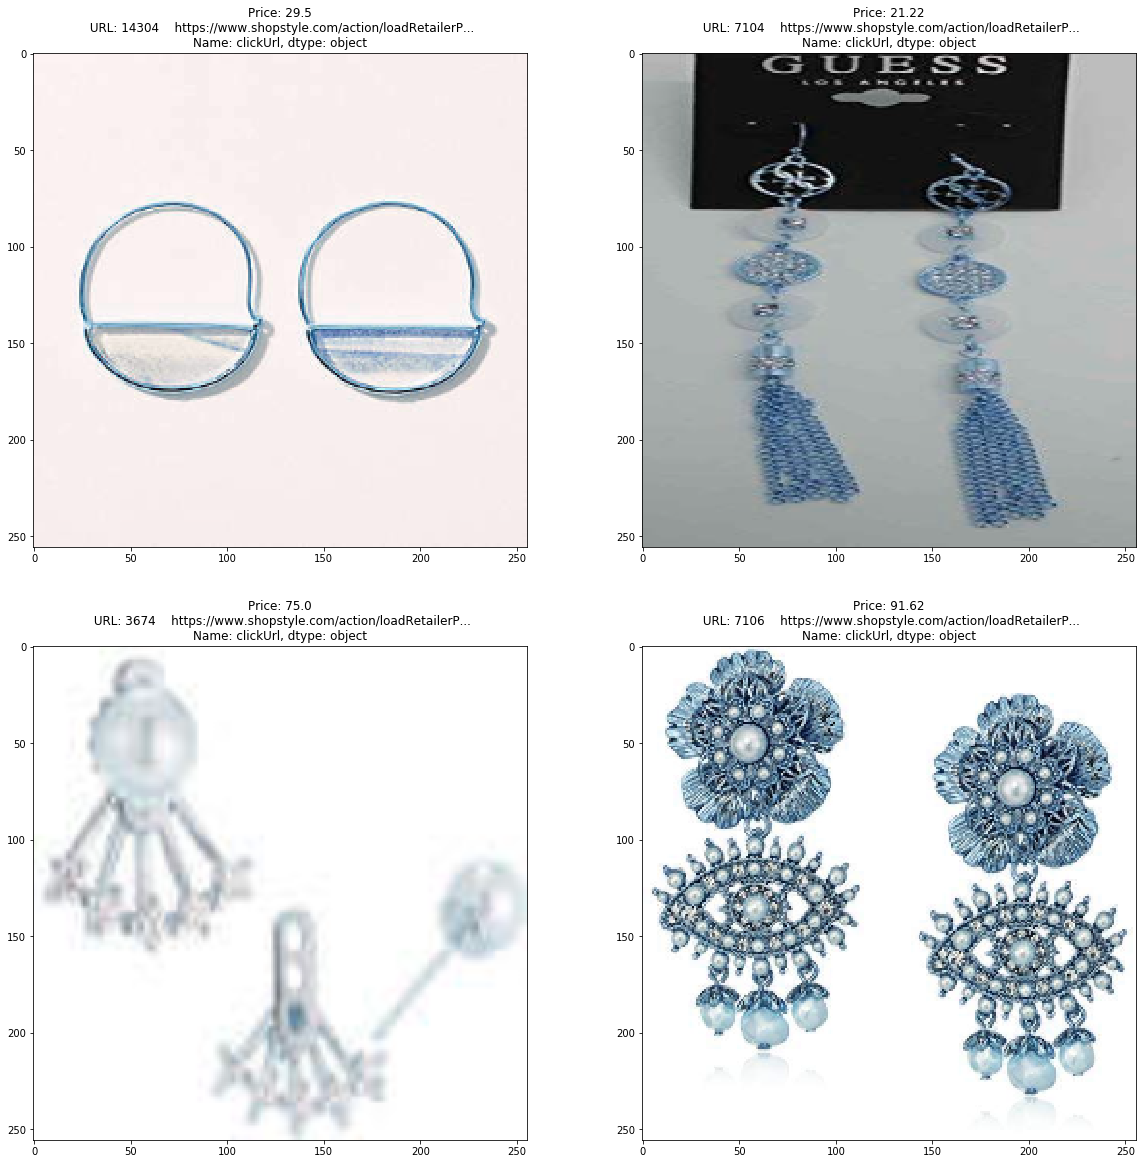

In [156]:
# n_neighbors of the test image
fig= plt.figure(figsize=(20, 20))
columns = 2
rows = 2


for i, idx in zip(range(0, columns*rows), filtered_products):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(read_novel_image(product_images[i], 256, 256))
    plt.title(f'Price: {product_prices[i]}\n URL: {product_urls[i]}')
plt.show()